In [2]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
sns.set()

In [3]:
# Imporing the dataset 
df = pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/Users/corbinjustin/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


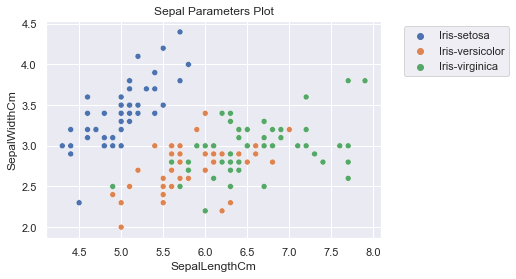

In [8]:
# Plotting the data
# Plotting the Sepal Area
plt.title('Sepal Parameters Plot')
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=df, hue='Species', palette="deep")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

/Users/corbinjustin/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


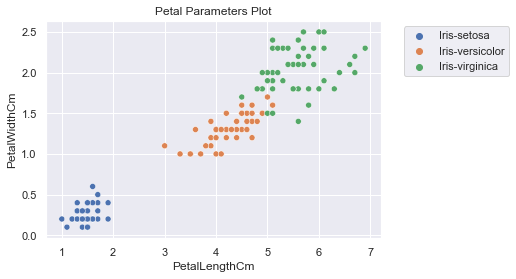

In [9]:
# Plotting the Petal Area

plt.title("Petal Parameters Plot")
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', palette="deep")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

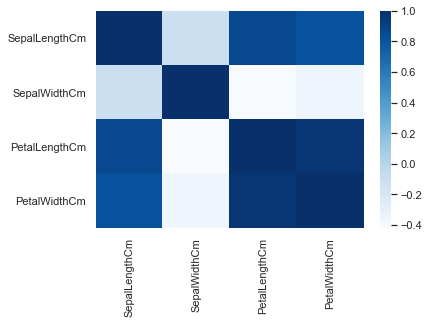

In [10]:
df_corr = df.copy()
df_corr = df_corr.drop(["Id", "Species"], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()


In [11]:
# Data Preprosessing 
# Dropping the Id Column
df.drop(["Id"], axis=1)

# Encoding the categorical data
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [12]:
# Spliting the data into testing and training sets
X = df.iloc[:, 3:5].values
y = df.iloc[:, -1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train) 

/Users/corbinjustin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [16]:
# Support Vector Classifier
SVC_classifier = SVC()
SVC_classifier.fit(X_train, y_train)

/Users/corbinjustin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [17]:
y_pred_lrc = lr_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_lrc.reshape(len(y_pred_lrc),1)),1))

[[1 1]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]]


In [18]:
y_pred_svc = SVC_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_svc.reshape(len(y_pred_svc),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]]


In [19]:
# Accuracy Score

accuracy_SVC_model = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy Score of Support Vector Classifier Model: {accuracy_SVC_model}")
accuracy_lrc_model = accuracy_score(y_test, y_pred_lrc)
print(f"Accuracy Score of Logistic Regression Classifier Model: {accuracy_lrc_model}")

Accuracy Score of Support Vector Classifier Model: 1.0
Accuracy Score of Logistic Regression Classifier Model: 0.9666666666666667
